In [1]:
import pandas as pd

# Read the Excel file
df = pd.read_excel("lottery_data.xlsx")

# Extract the last 2 digits from each number in the "Number" column
lottery_list = df['number'].map(lambda x: str(x)[-2:]).tolist()

print(lottery_list)

['95', '06', '04', '24', '15', '92', '78', '43', '48', '51', '52', '59', '91', '92', '70', '15', '25', '27', '72', '31', '17', '65', '39', '62', '55', '78', '11', '44', '42', '08', '72', '55', '85', '69', '08', '27', '07', '80', '97', '59', '64', '95', '54', '34', '68', '26', '60', '05', '38', '79', '64', '89', '71', '12', '97', '50', '68', '92', '31', '15', '48', '44', '19', '32', '95', '14', '98', '46', '10', '01', '03', '95', '26', '27', '01', '80', '96', '41', '28', '81', '31', '41', '29', '63', '66', '16', '53', '83', '41', '50', '87', '30', '40', '79', '77', '83', '15', '84', '39', '77', '44', '22', '34', '25', '78', '74', '35', '29', '90', '81', '92', '93', '96', '15', '66', '59', '44', '25', '92', '09', '21', '35', '64', '91', '93', '16', '94', '07', '63', '32', '94', '44', '75', '84', '37', '04', '01', '96', '22', '57', '18', '27', '65', '81', '57', '69', '19', '81', '54', '88', '37', '81', '30', '42', '96', '46', '92', '72', '65', '72', '44', '25', '32', '50', '99', '42', '63

In [2]:
from collections import Counter

# Filter out non-numeric values from the lottery_list
filtered_lottery_list = [x for x in lottery_list if x.isdigit()]

# Convert the filtered lottery_list to integers
lottery_numbers = list(map(int, filtered_lottery_list))

# Count the frequency of each number
frequency_count = Counter(lottery_numbers)

# Convert the frequency count to a DataFrame
frequency_df = pd.DataFrame(list(frequency_count.items()), columns=['Number', 'Frequency'])

# Sort the DataFrame by Number
frequency_df = frequency_df.sort_values(by='Number').reset_index(drop=True)

frequency_df

,Number,Frequency
0,0,443
1,1,434
2,2,422
3,3,412
4,4,445
...,...,...
95,95,387
96,96,442
97,97,443
98,98,395


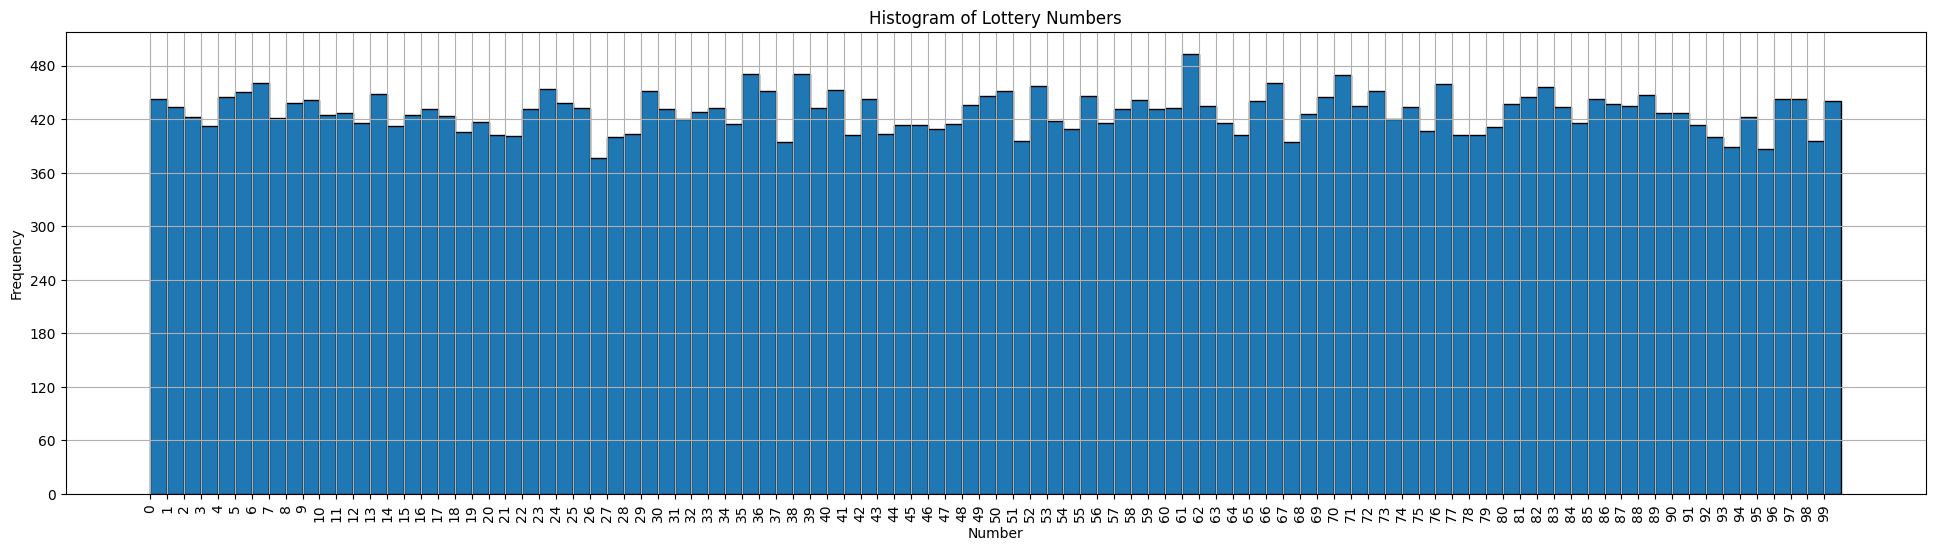

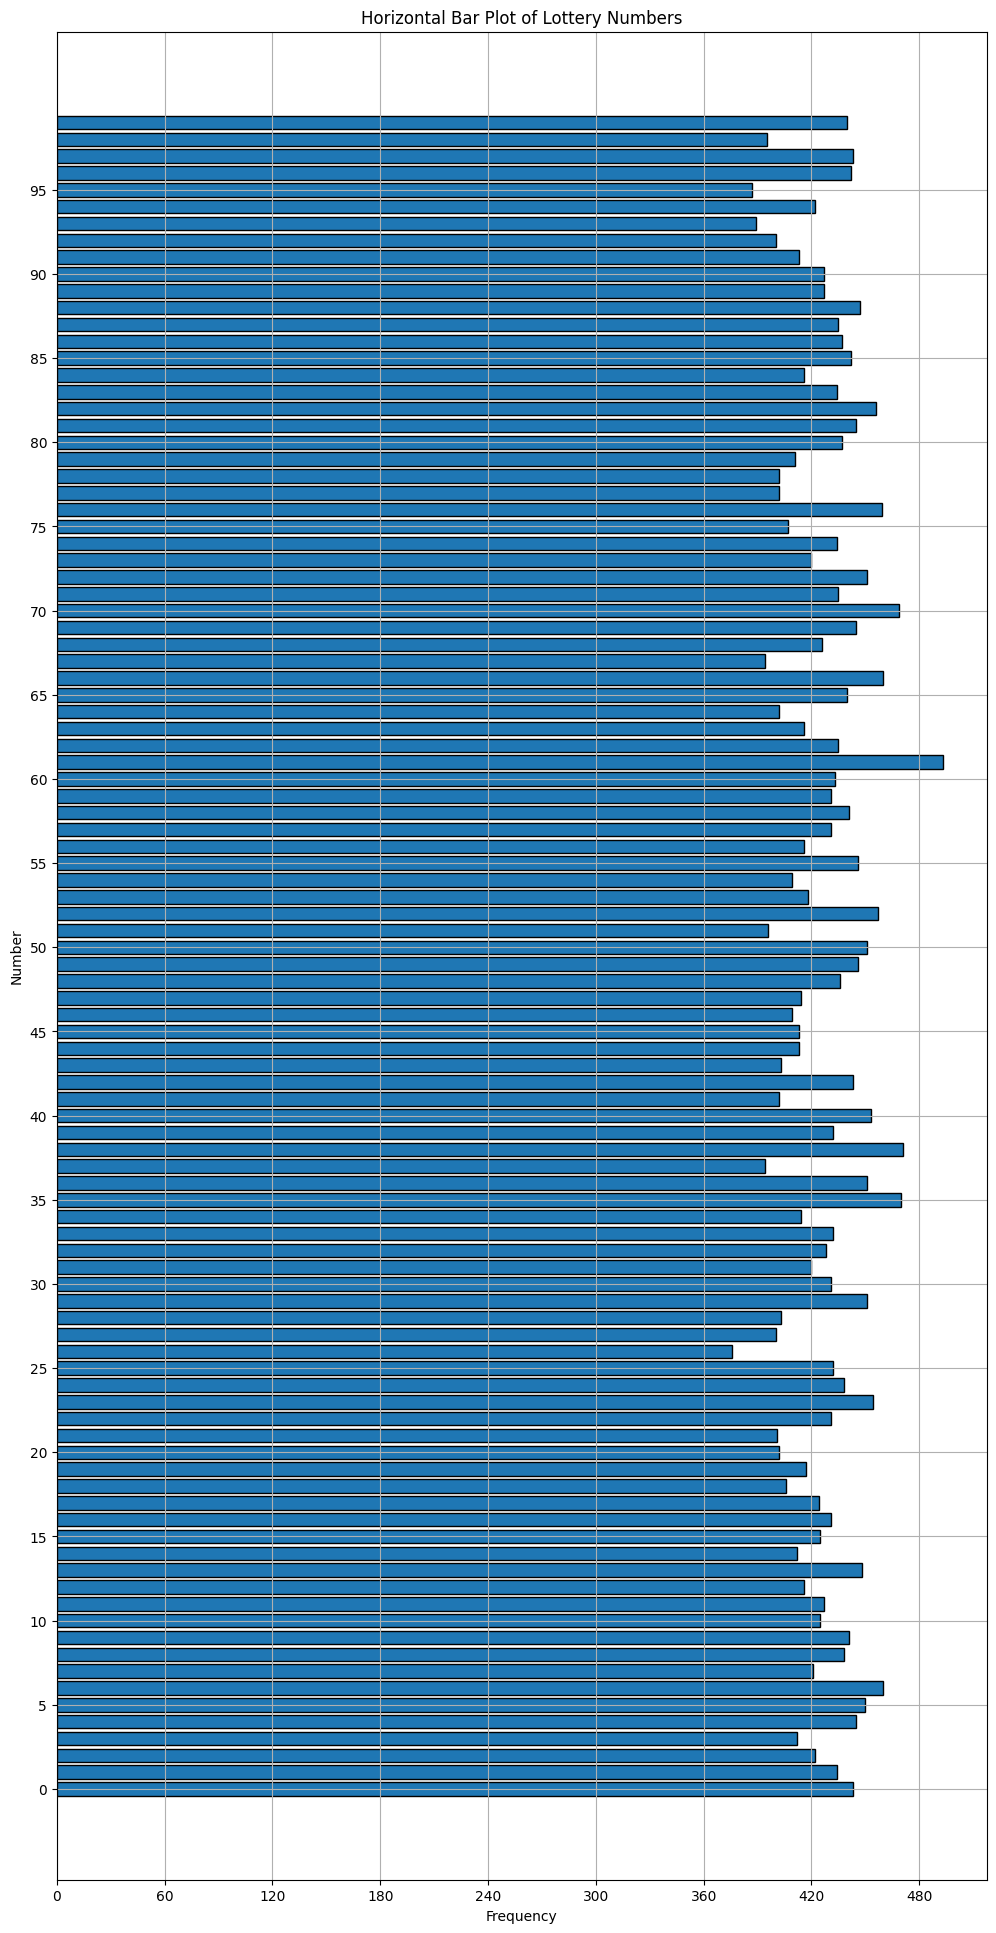

In [3]:
# First plot
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt

# Convert the filtered lottery_list to integers
lottery_numbers = list(map(int, filtered_lottery_list))

# Plot the histogram with a larger figure size
plt.figure(figsize=(24, 6))
plt.hist(lottery_numbers, bins=range(101), edgecolor='black')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Histogram of Lottery Numbers')
plt.xticks(range(0, 100, 5))  # Set x-ticks at intervals of 5
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)

# Display the numbers on the x-axis with rotation to avoid overlap
plt.xticks(range(0, 100, 1), rotation=90)

plt.show()

# Second plot (switch x-axis and y-axis)
plt.figure(figsize=(12, 24))
plt.barh(frequency_df['Number'], frequency_df['Frequency'], edgecolor='black')
plt.ylabel('Number')
plt.xlabel('Frequency')
plt.title('Horizontal Bar Plot of Lottery Numbers')
plt.yticks(range(0, 100, 5))  # Set y-ticks at intervals of 5
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)

plt.show()

## Check Uniformly

### Standard deviation

In [4]:
import numpy as np

# Calculate the frequency of each number
frequency, bins = np.histogram(lottery_numbers, bins=range(101))

# Calculate mean and standard deviation
mean_frequency = np.mean(frequency)
std_frequency = np.std(frequency)
cv = std_frequency / mean_frequency

print(f"Mean Frequency: {mean_frequency}")
print(f"Standard Deviation of Frequency: {std_frequency}")
print(f"Coefficient of Variation: {cv}")

Mean Frequency: 428.24
Standard Deviation of Frequency: 21.13675471778958
Coefficient of Variation: 0.04935726395897062


### Kolmogorov–Smirnov test

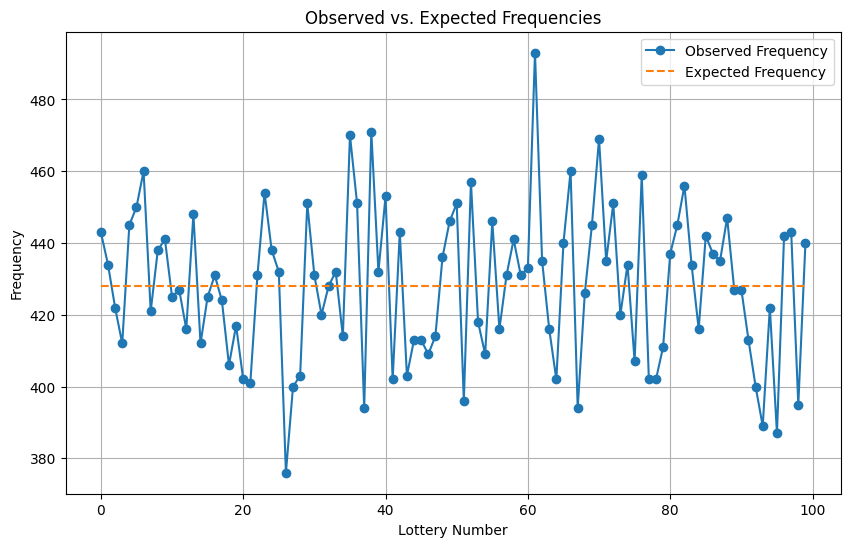

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate observed and expected frequencies
observed_freq, _ = np.histogram(lottery_numbers, bins=range(101))
expected_freq = np.full_like(
    observed_freq, fill_value=len(lottery_numbers) / 100)

# Plot observed vs. expected frequencies
plt.figure(figsize=(10, 6))
plt.plot(observed_freq, label='Observed Frequency', marker='o')
plt.plot(expected_freq, label='Expected Frequency', linestyle='--')
plt.xlabel('Lottery Number')
plt.ylabel('Frequency')
plt.title('Observed vs. Expected Frequencies')
plt.legend()
plt.grid(True)
plt.show()

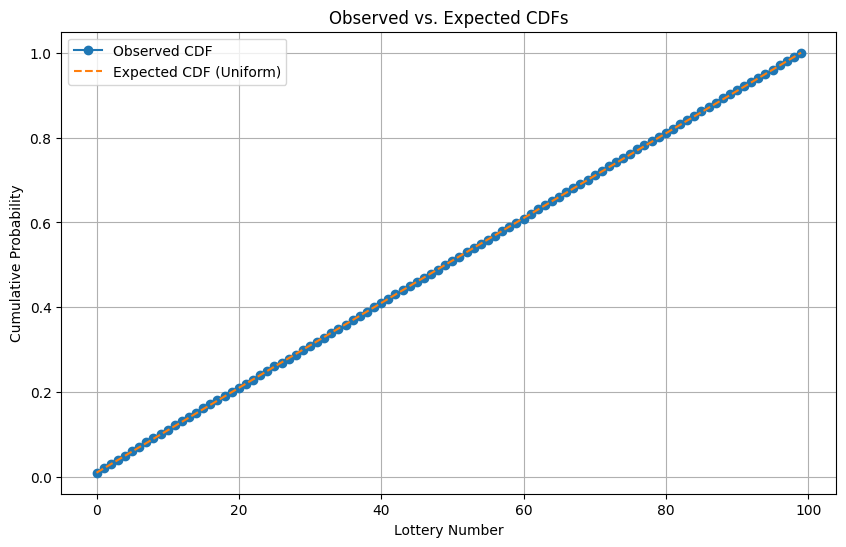

In [6]:
# Calculate the CDF of the observed data
observed_cdf = np.cumsum(observed_freq) / np.sum(observed_freq)

# Calculate the CDF of the expected uniform distribution
expected_cdf = np.cumsum(expected_freq) / np.sum(expected_freq)

# Plot the CDFs
plt.figure(figsize=(10, 6))
plt.plot(observed_cdf, label='Observed CDF', marker='o')
plt.plot(expected_cdf, label='Expected CDF (Uniform)', linestyle='--')
plt.xlabel('Lottery Number')
plt.ylabel('Cumulative Probability')
plt.title('Observed vs. Expected CDFs')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
predicted_df_2025 = pd.DataFrame({'Number': range(100)})
predicted_df_2025['Predicted_Frequency'] = len(lottery_numbers) / 100
# Find the number with the highest predicted frequency
max_predicted_frequency = predicted_df_2025['Predicted_Frequency'].max()
best_number = predicted_df_2025[predicted_df_2025['Predicted_Frequency'] == max_predicted_frequency]['Number'].values[0]

print(f"The number you should buy the most is: {best_number}")

The number you should buy the most is: 0
